# Model 410 basicHySa

Charlie Shobe

This model has SPACE river erosion (i.e., ErosionDeposition executed on both sediment and bedrock). It also has depth-dependent diffusion but I'm only here to test the fluvial component. and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-E_s - E_r + D_s$$

I'm going to keep $F_f=0$ and $\phi=0$.

So, at steady state, the landscape will obey:
$$S=\left(\frac{UV}{K_sA^mr}+\frac{U}{K_rA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$).

In [1]:
from erosion_model import BasicHySa
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sed_sp' : 0.01,
          'K_rock_sp' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'v_sc' : 1.0,
          'phi' : 0.0,
          'F_f' : 0.0,
          'H_star' : 1.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'method' : 'simple_stream_power',
          'output_filename' : 'model_000_output',
          'soil_transport_decay_depth' : 1.0,
          'max_soil_production_rate' : 0,
          'soil_production_decay_depth' : 1.0,
          'initial_soil_thickness' : 0.0,
          'solver' : 'basic'
}

In [3]:
#instantiate and establish topo error tolerance
hy = BasicHySa(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    hy.run_one_step(dt)
    post_topo = hy.grid.at_node['topographic__elevation'][hy.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print elapsed_time
        print 'MAX: ', max(abs(pre_topo - post_topo))
        print 'MEAN: ', np.average(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
MAX:  0.182432449065
MEAN:  0.00405865365139
1000
MAX:  0.00809463144384
MEAN:  0.00330656705261
2000
MAX:  0.00696821511244
MEAN:  0.00286750096638
3000
MAX:  0.00660665777711
MEAN:  0.00221437440335
4000
MAX:  0.0222960559831
MEAN:  0.00167438674703
5000
MAX:  0.0077263903741
MEAN:  0.00121625785153
6000
MAX:  0.0108319540165
MEAN:  0.000887764345939
7000
MAX:  0.00962399234922
MEAN:  0.000669576864408
8000
MAX:  0.00791972339148
MEAN:  0.000512309030973
9000
MAX:  0.0164713546857
MEAN:  0.000461291302886
10000
MAX:  0.0177671537207
MEAN:  0.000390207584984
11000
MAX:  0.009767912161
MEAN:  0.000331131088299
12000
MAX:  0.0117383163158
MEAN:  0.000294682424057
13000
MAX:  0.0112261516649
MEAN:  0.000269447081613
14000
MAX:  0.00857165418258
MEAN:  0.000255840820436
15000
MAX:  0.00904690234589
MEAN:  0.000254648358153
16000
MAX:  0.0135865959483
MEAN:  0.000237847712547
17000
MAX:  0.00927972020399
MEAN:  0.000223707140199
18000
MAX:  0.010137592148
MEAN:  0.000208806336601
19000
M

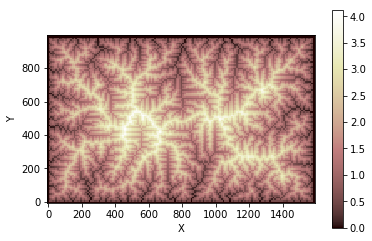

In [5]:
%matplotlib inline
imshow_grid(hy.grid, 'topographic__elevation')

0.055


(0.0001, 0.05)

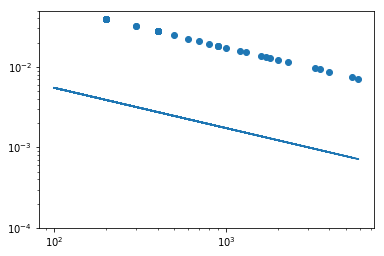

In [6]:
print hy.grid.at_node['topographic__steepest_slope'][235]
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)])

#first plot the line for SPACE with a constant threshold NOT SMOOTHED
plt.plot(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], ((0.00005) / 0.01)*np.power(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], -0.5) + ((0.00005) / 0.001)*np.power(hy.grid.at_node['drainage_area'][(hy.grid.node_x > 1)&(hy.grid.node_x < 158)&(hy.grid.node_y >1)&(hy.grid.node_y<98)], -0.5))

plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 0.05)

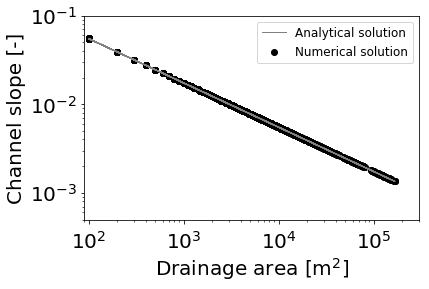

In [11]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = hy.grid.at_node['drainage_area'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]
slope_array = hy.grid.at_node['topographic__steepest_slope'][(hy.grid.node_x > 10)&(hy.grid.node_x < 1580)&(hy.grid.node_y >10)&(hy.grid.node_y<980)]


#plotting param
matplotlib.rcParams.update({'font.size': 20})

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()


#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k_bedrock = 0.001 #fluvial erodibility
k_sediment = 0.01
m = 0.5 #discharge exponent
n = 1.0 #slope exponent
v_sc = 1.0 #m/yr, effective settling velocity

#calculate analytical slope from area field
analytical_slope_array = np.power(((u * v_sc) / k_sediment) + (u / k_bedrock), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 3*10**5)
slope_area.set_ylim(5e-4, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('hybrid_soil_alluvium_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

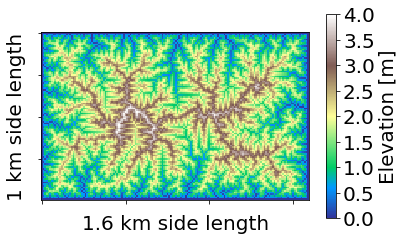

In [10]:
##MAKE TOPO FIGURE
#define 'topo'
topo = hy.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 4.0)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('hybrid_soil_alluvium_topo.eps',bbox_inches='tight', dpi=300)